In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import sys

In [2]:
# 두 개의 이미지 합치기 = cv.add() / numpy 더하기
x = np.uint8([250])
y = np.uint8([10])

# cv.add() ==> 250 + 10 = 266 => 255 (255가 넘으면 255로 자동 환산!!) 이것이 더 정확함!!!
print(cv.add(x, y))

# numpy 더하기 ==> 250 + 10 = 260 % 256 = 4 (255가 넘으면 더한 값이 256 나머지 연산)
print(x + y) 

[[255]]
[4]


In [3]:
# # 이미지 블렌딩 = 두 개의 이미지 섞기
img1 = cv.imread('../samples/ml.png')
img2 = cv.imread('../samples/opencv-logo.png')
print(img1.shape, img2.shape)

# dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

# cv.imshow('dst',dst)
# cv.waitKey(0)
# cv.destroyAllWindows()

(380, 308, 3) (794, 600, 3)


In [4]:
# 두 이미지를 블렌딩 하려면 크기가 같아야 함
# resize! 큰 걸 작은거에 맞추자

img2_rs = cv.resize(img2, dsize=(308, 380), interpolation=cv.INTER_AREA)
img1.shape, img2_rs.shape

((380, 308, 3), (380, 308, 3))

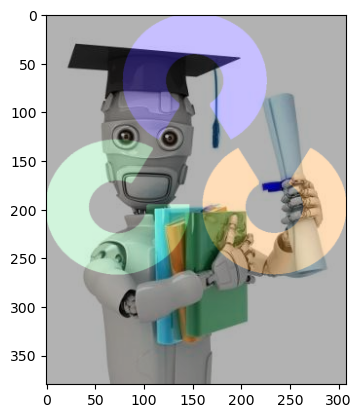

In [5]:
dst = cv.addWeighted(img1, 0.7, img2_rs, 0.3, 0)

plt.imshow(dst)

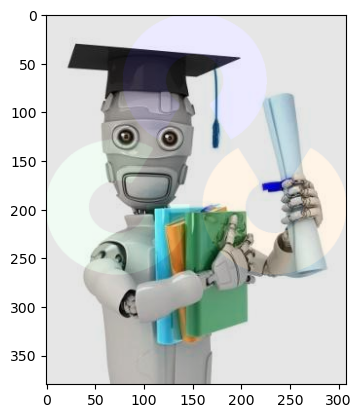

In [6]:
dst = cv.addWeighted(img1, 0.9, img2_rs, 0.1, 0)

plt.imshow(dst)

In [7]:
# BitWise 연산(and, or, not, xor)
# 이미지의 일부분을 추출, 정사각형 모양이 아닌 ROI 정의 및 처리에 유용함
# 메시 사진 위에 OPENCV 로고를 얹어봅시다!

img1 = cv.imread('../samples/messi5.jpg')
img2 = cv.imread('../samples/opencv-logo-white.png')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)


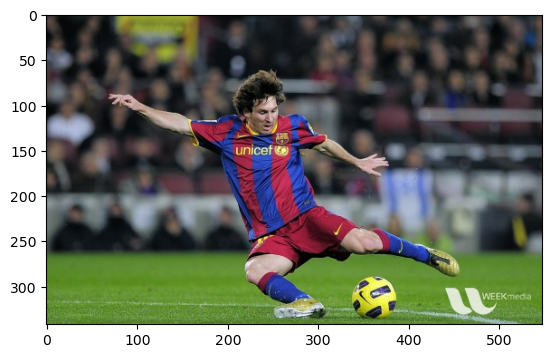

In [8]:
plt.imshow(img1)

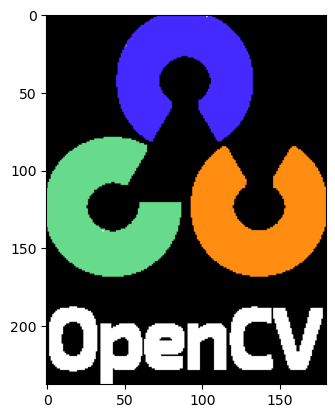

In [9]:
plt.imshow(img2)

In [10]:
# 로고를 메시 사진 좌측 상단에 위치하도록 만들고 싶다면
rows, cols, channels = img2.shape

# 로고의 크기만큼 메시 사진 상단에 ROI 설정
roi = img1[0:rows, 0:cols]

# 로고를 위한 마스크, 역 마스크를 생성
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# threshold 함수는 나중에 또 배우게 됩니다~!
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
                        

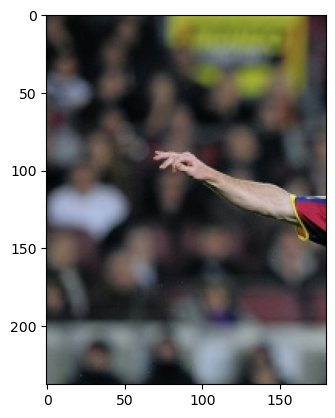

In [11]:
plt.imshow(roi)

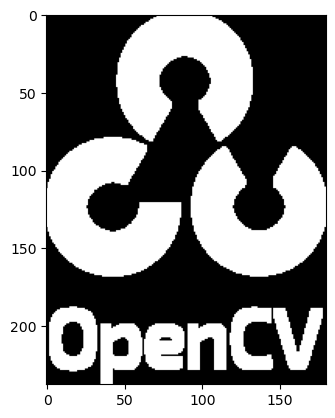

In [12]:
plt.imshow(mask, cmap='gray')

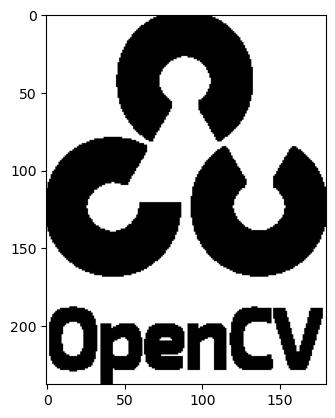

In [13]:
plt.imshow(mask_inv, cmap='gray')

In [14]:
# https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14

# ROI 내에서 로고 영역을 검정색으로 처리
img1_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

# 로고 이미지에서 로고 영역만 가져오기
img2_fg = cv.bitwise_and(img2, img2, mask = mask)


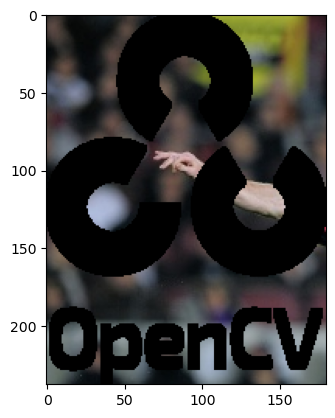

In [15]:
plt.imshow(img1_bg)

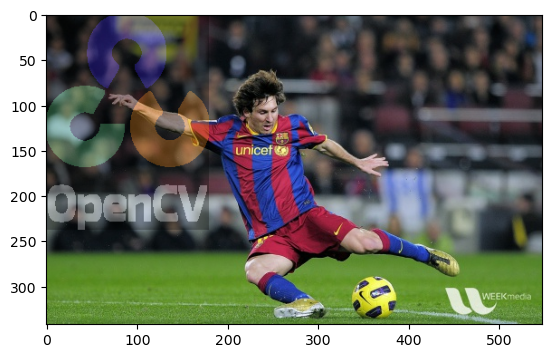

In [16]:
weighted = cv.addWeighted(roi, 0.7, img2, 0.3, 0)

plt.imshow(weighted)

img1[0:rows, 0:cols] = weighted

plt.imshow(img1)

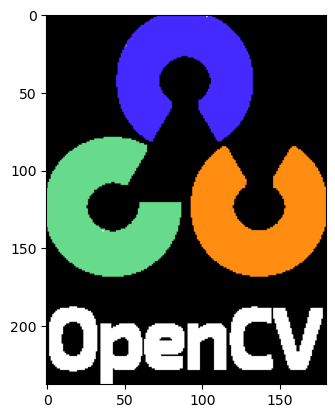

In [17]:
plt.imshow(img2_fg)

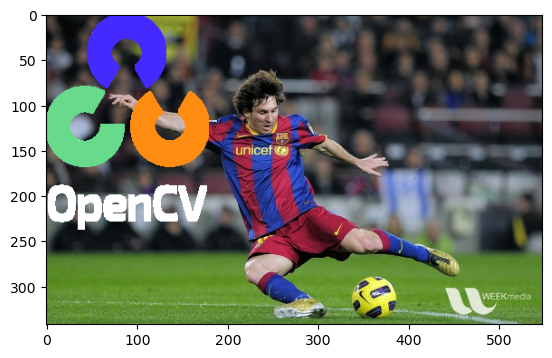

In [18]:
# ROI 내에 로고를 위치하도록 설정
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)

In [18]:
# 더 쉬운 방법: copyTo = 원본 이미지랑 마스킹 이미지랑 크기가 같아야 함!!!!

src = cv.imread('../samples/airplane.bmp', cv.IMREAD_COLOR)
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
mask = cv.imread('../samples/mask_plane.bmp', cv.IMREAD_GRAYSCALE)
dst = cv.imread("../samples/field.bmp", cv.IMREAD_COLOR)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

# 파일 불러오기 확인
if src is None or mask is None:
    print('Image load failed')
    sys.exit()


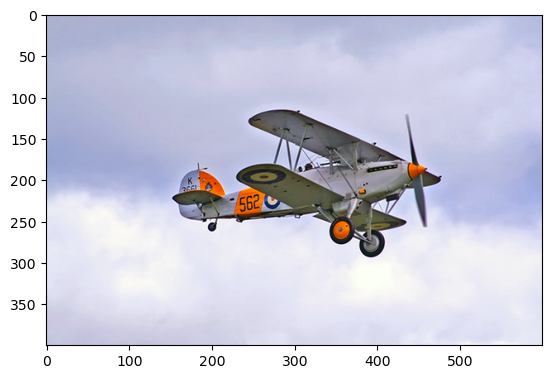

In [19]:
plt.imshow(src)

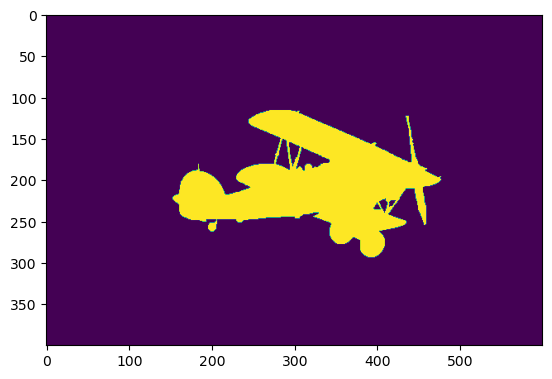

In [20]:
plt.imshow(mask)

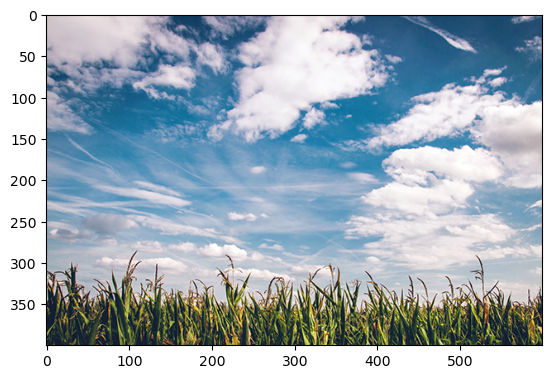

In [21]:
plt.imshow(dst)

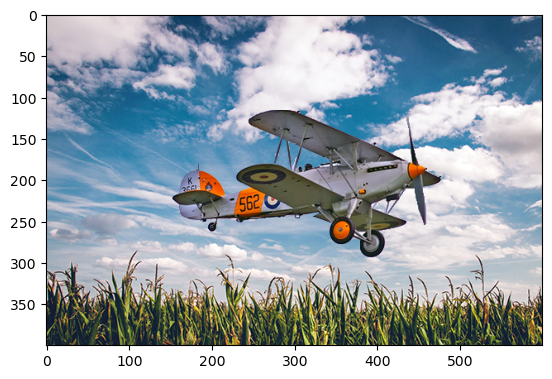

In [22]:
cv.copyTo(src, mask, dst)

plt.imshow(dst)